<a href="https://colab.research.google.com/github/kkiattikulpimol/Khemmanat.github.io/blob/main/sport_car_prices_dataset_work_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Sports Car Prices Dataset - Multiple Graphs in Columns
# Each function displays multiple related graphs in column layout

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set styling for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['font.size'] = 10

In [ ]:
# Sports Car Prices Dataset - Multiple Graphs in Columns
# Each function displays multiple related graphs in column layout

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set styling for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['font.size'] = 10

# ================================
# DATA LOADING SECTION
# ================================

def load_sports_car_data():
    """Load the sports car dataset"""
    print("📊 Loading Sports Car Dataset...")

    # REPLACE THIS SECTION WITH YOUR ACTUAL DATA:
    # df = pd.read_csv('sports_car_prices.csv')

    # Sample data (REMOVE when you have real data)
    np.random.seed(42)
    n_cars = 1000

    makes = ['Ferrari', 'Lamborghini', 'Porsche', 'McLaren', 'Aston Martin',
             'Chevrolet', 'Ford', 'BMW', 'Mercedes-AMG', 'Nissan', 'Audi', 'Jaguar']

    df = pd.DataFrame({
        'Make': np.random.choice(makes, n_cars),
        'Year': np.random.randint(2010, 2024, n_cars),
        'Horsepower': np.random.randint(300, 800, n_cars),
        'Engine_Size': np.round(np.random.uniform(3.0, 6.5, n_cars), 1),
        'Top_Speed': np.random.randint(180, 350, n_cars),
        'Acceleration_0_60': np.round(np.random.uniform(2.5, 6.0, n_cars), 1),
        'Price': np.random.randint(50000, 500000, n_cars)
    })

    # Add realistic correlations
    df['Price'] = (df['Horsepower'] * 200 +
                   df['Top_Speed'] * 300 +
                   (2024 - df['Year']) * -5000 +
                   np.random.normal(0, 20000, n_cars)).astype(int)
    df['Price'] = np.clip(df['Price'], 50000, 800000)

    print(f"✅ Loaded {len(df)} cars from {df['Make'].nunique()} manufacturers")
    return df

📊 Loading Sports Car Dataset...
✅ Loaded 1000 cars from 12 manufacturers


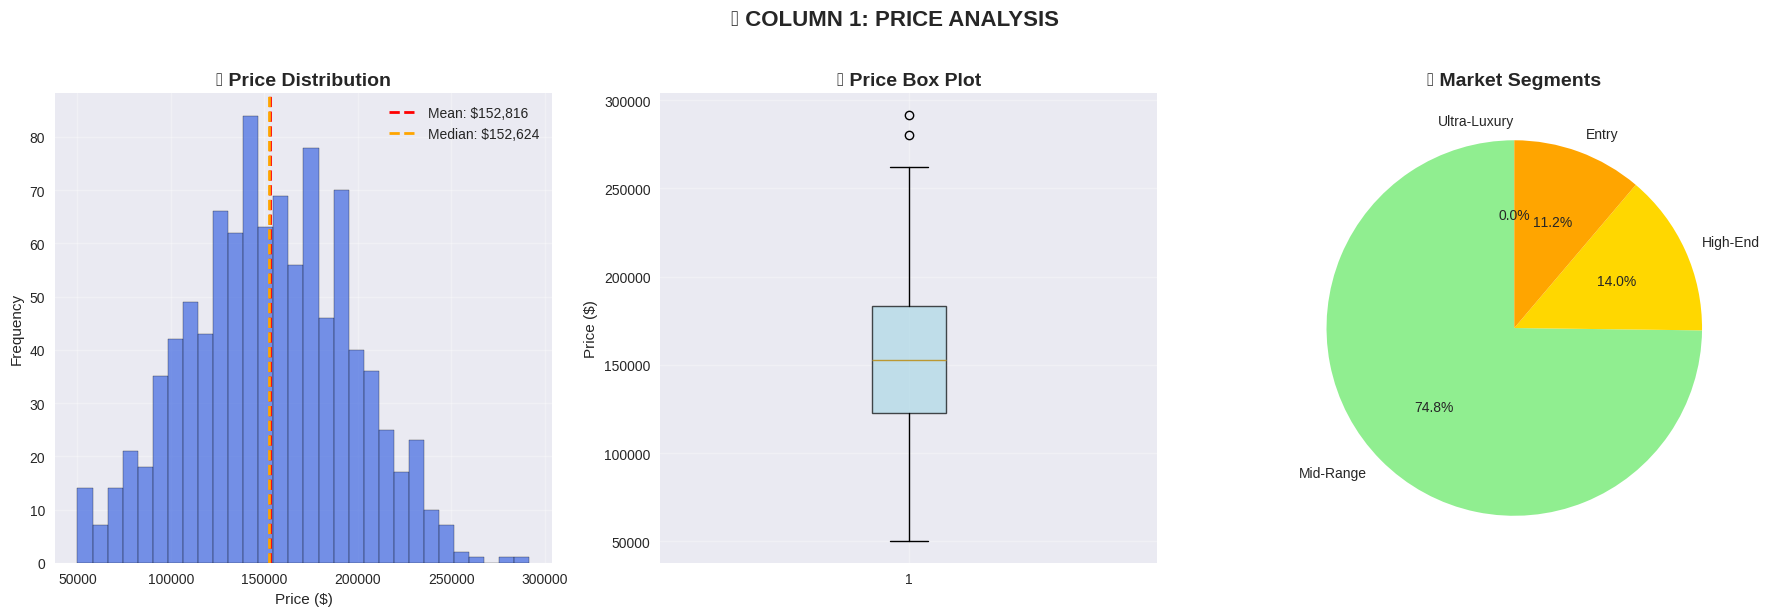

In [ ]:
# ================================
# COLUMN 1: PRICE ANALYSIS (3 GRAPHS)
# ================================

def column_1_price_analysis(df):
    """Column 1: Price Distribution and Analysis (3 graphs)"""
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # Graph 1.1: Price Distribution Histogram
    ax1.hist(df['Price'], bins=30, alpha=0.7, color='royalblue', edgecolor='black')
    mean_price = df['Price'].mean()
    median_price = df['Price'].median()
    ax1.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_price:,.0f}')
    ax1.axvline(median_price, color='orange', linestyle='--', linewidth=2, label=f'Median: ${median_price:,.0f}')
    ax1.set_title('📊 Price Distribution', fontweight='bold', fontsize=14)
    ax1.set_xlabel('Price ($)')
    ax1.set_ylabel('Frequency')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Graph 1.2: Price Box Plot
    box_plot = ax2.boxplot(df['Price'], patch_artist=True, vert=True)
    box_plot['boxes'][0].set_facecolor('lightblue')
    box_plot['boxes'][0].set_alpha(0.7)
    ax2.set_title('📦 Price Box Plot', fontweight='bold', fontsize=14)
    ax2.set_ylabel('Price ($)')
    ax2.grid(True, alpha=0.3)

    # Graph 1.3: Price by Market Segments
    df['Price_Segment'] = pd.cut(df['Price'], bins=[0, 100000, 200000, 300000, float('inf')],
                                labels=['Entry', 'Mid-Range', 'High-End', 'Ultra-Luxury'])
    segment_counts = df['Price_Segment'].value_counts()
    colors = ['lightgreen', 'gold', 'orange', 'red']
    ax3.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
    ax3.set_title('🎯 Market Segments', fontweight='bold', fontsize=14)

    plt.suptitle('💰 COLUMN 1: PRICE ANALYSIS', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# Call the function to display the graph when the cell is run
# Ensure df is defined before calling the function
df = load_sports_car_data() # Load data if df is not defined
column_1_price_analysis(df)

📊 Loading Sports Car Dataset...
✅ Loaded 1000 cars from 12 manufacturers


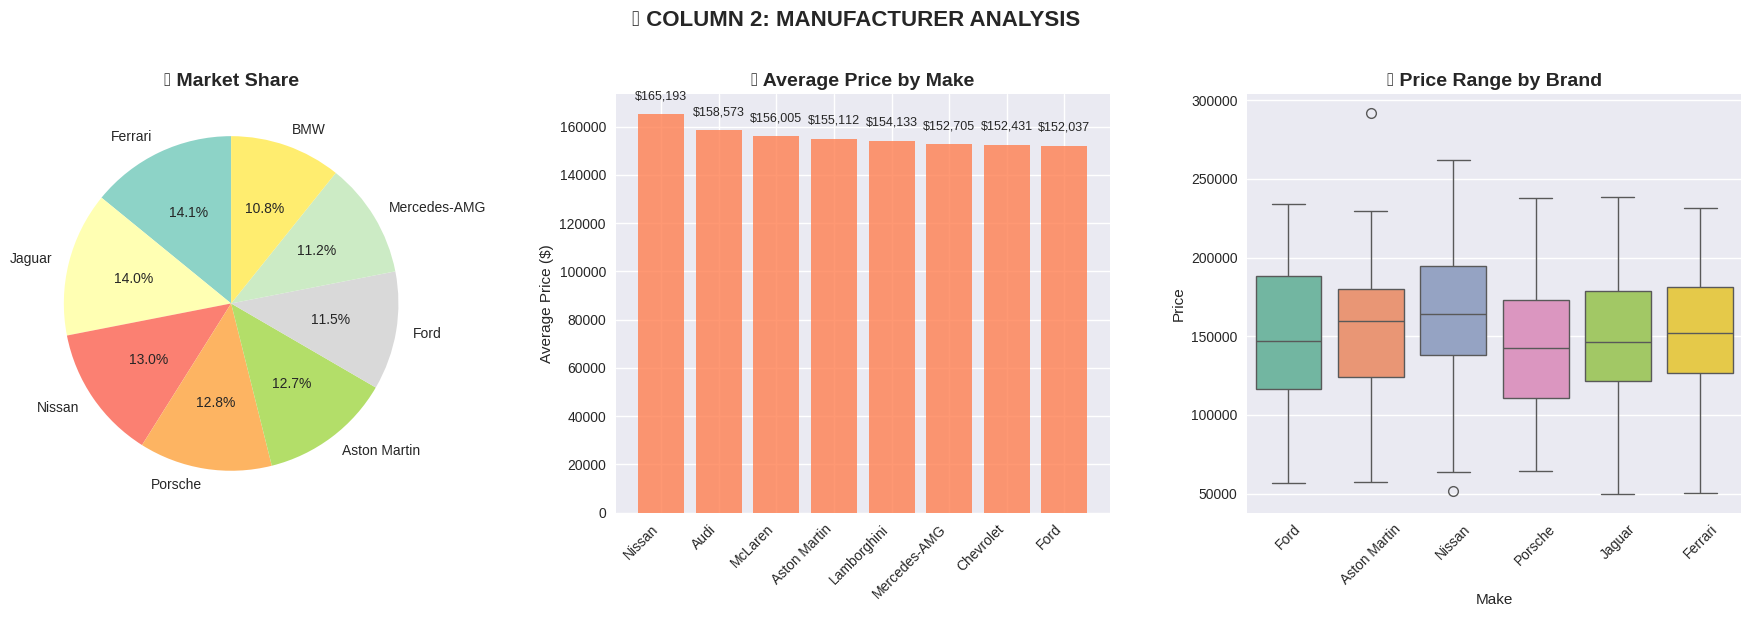

In [ ]:
# ================================
# COLUMN 2: MANUFACTURER ANALYSIS (3 GRAPHS)
# ================================

def column_2_manufacturer_analysis(df):
    """Column 2: Manufacturer Analysis (3 graphs)"""
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # Graph 2.1: Market Share Pie Chart
    make_counts = df['Make'].value_counts().head(8)
    colors = plt.cm.Set3(np.linspace(0, 1, len(make_counts)))
    ax1.pie(make_counts.values, labels=make_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
    ax1.set_title('🏭 Market Share', fontweight='bold', fontsize=14)

    # Graph 2.2: Average Price by Manufacturer
    avg_prices = df.groupby('Make')['Price'].mean().sort_values(ascending=False).head(8)
    bars = ax2.bar(range(len(avg_prices)), avg_prices.values, color='coral', alpha=0.8)
    ax2.set_xticks(range(len(avg_prices)))
    ax2.set_xticklabels(avg_prices.index, rotation=45, ha='right')
    ax2.set_title('💰 Average Price by Make', fontweight='bold', fontsize=14)
    ax2.set_ylabel('Average Price ($)')
    ax2.ticklabel_format(style='plain', axis='y')

    # Add value labels on bars
    for bar, price in zip(bars, avg_prices.values):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5000,
                f'${price:,.0f}', ha='center', va='bottom', fontsize=9)

    # Graph 2.3: Price Range by Top Manufacturers (Box Plot)
    top_makes = df['Make'].value_counts().head(6).index
    df_top = df[df['Make'].isin(top_makes)]
    sns.boxplot(data=df_top, x='Make', y='Price', ax=ax3, palette='Set2')
    ax3.set_title('📊 Price Range by Brand', fontweight='bold', fontsize=14)
    ax3.tick_params(axis='x', rotation=45)


    plt.suptitle('🏭 COLUMN 2: MANUFACTURER ANALYSIS', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# Call the function to display the graph when the cell is run
# Ensure df is defined before calling the function
df = load_sports_car_data() # Load data if df is not defined
column_2_manufacturer_analysis(df)

📊 Loading Sports Car Dataset...
✅ Loaded 1000 cars from 12 manufacturers


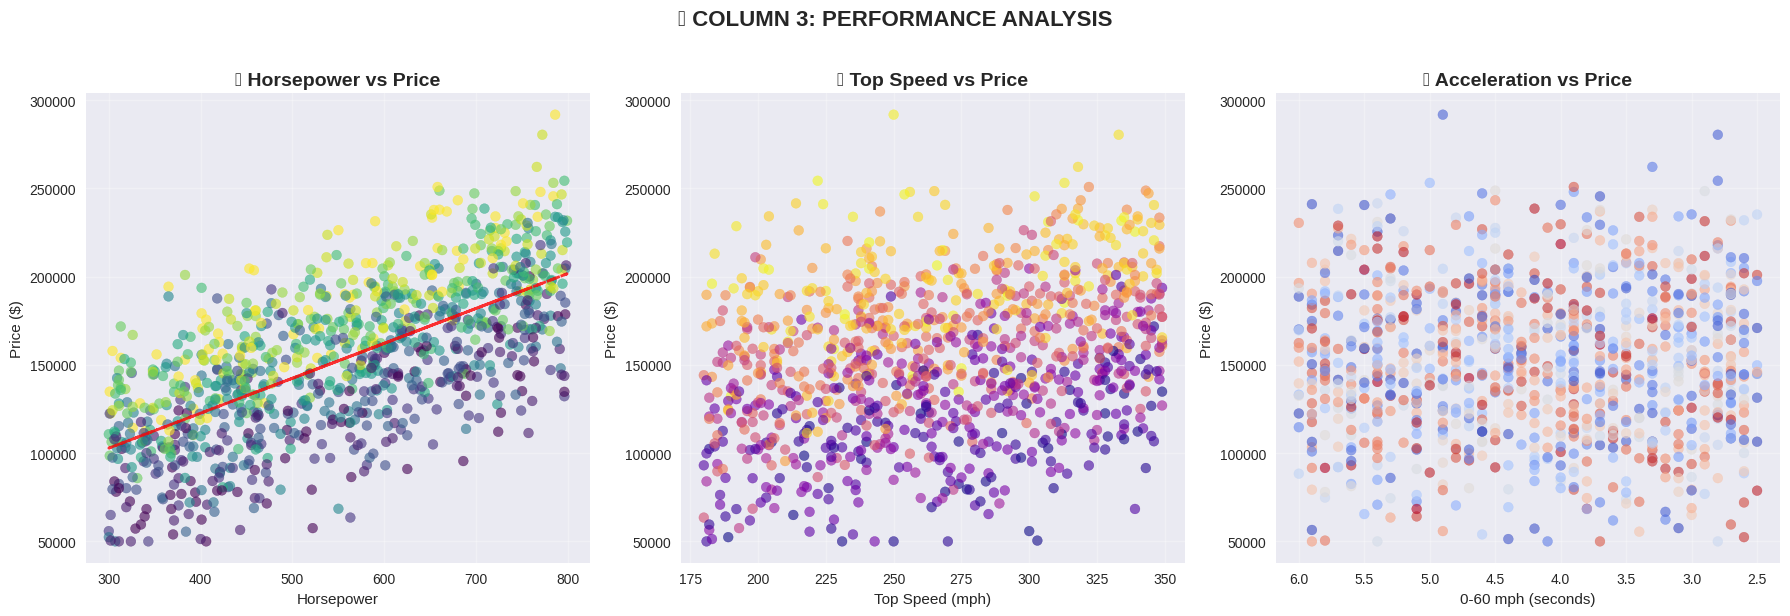

In [ ]:
# ================================
# COLUMN 3: PERFORMANCE ANALYSIS (3 GRAPHS)
# ================================

def column_3_performance_analysis(df):
    """Column 3: Performance Analysis (3 graphs)"""
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # Graph 3.1: Horsepower vs Price
    scatter1 = ax1.scatter(df['Horsepower'], df['Price'], alpha=0.6, c=df['Year'], cmap='viridis', s=50)
    z1 = np.polyfit(df['Horsepower'], df['Price'], 1)
    p1 = np.poly1d(z1)
    ax1.plot(df['Horsepower'], p1(df['Horsepower']), "r--", alpha=0.8, linewidth=2)
    ax1.set_title('💪 Horsepower vs Price', fontweight='bold', fontsize=14)
    ax1.set_xlabel('Horsepower')
    ax1.set_ylabel('Price ($)')
    ax1.grid(True, alpha=0.3)

    # Graph 3.2: Top Speed vs Price
    scatter2 = ax2.scatter(df['Top_Speed'], df['Price'], alpha=0.6, c=df['Horsepower'], cmap='plasma', s=50)
    ax2.set_title('🏁 Top Speed vs Price', fontweight='bold', fontsize=14)
    ax2.set_xlabel('Top Speed (mph)')
    ax2.set_ylabel('Price ($)')
    ax2.grid(True, alpha=0.3)

    # Graph 3.3: Acceleration vs Price
    df['Age'] = 2024 - df['Year']
    scatter3 = ax3.scatter(df['Acceleration_0_60'], df['Price'], alpha=0.6, c=df['Engine_Size'], cmap='coolwarm', s=50)
    ax3.set_title('⚡ Acceleration vs Price', fontweight='bold', fontsize=14)
    ax3.set_xlabel('0-60 mph (seconds)')
    ax3.set_ylabel('Price ($)')
    ax3.invert_xaxis()
    ax3.grid(True, alpha=0.3)

    plt.suptitle('🏁 COLUMN 3: PERFORMANCE ANALYSIS', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# Call the function to display the graph when the cell is run
# Ensure df is defined before calling the function
df = load_sports_car_data() # Load data if df is not defined
column_3_performance_analysis(df)

📊 Loading Sports Car Dataset...
✅ Loaded 1000 cars from 12 manufacturers


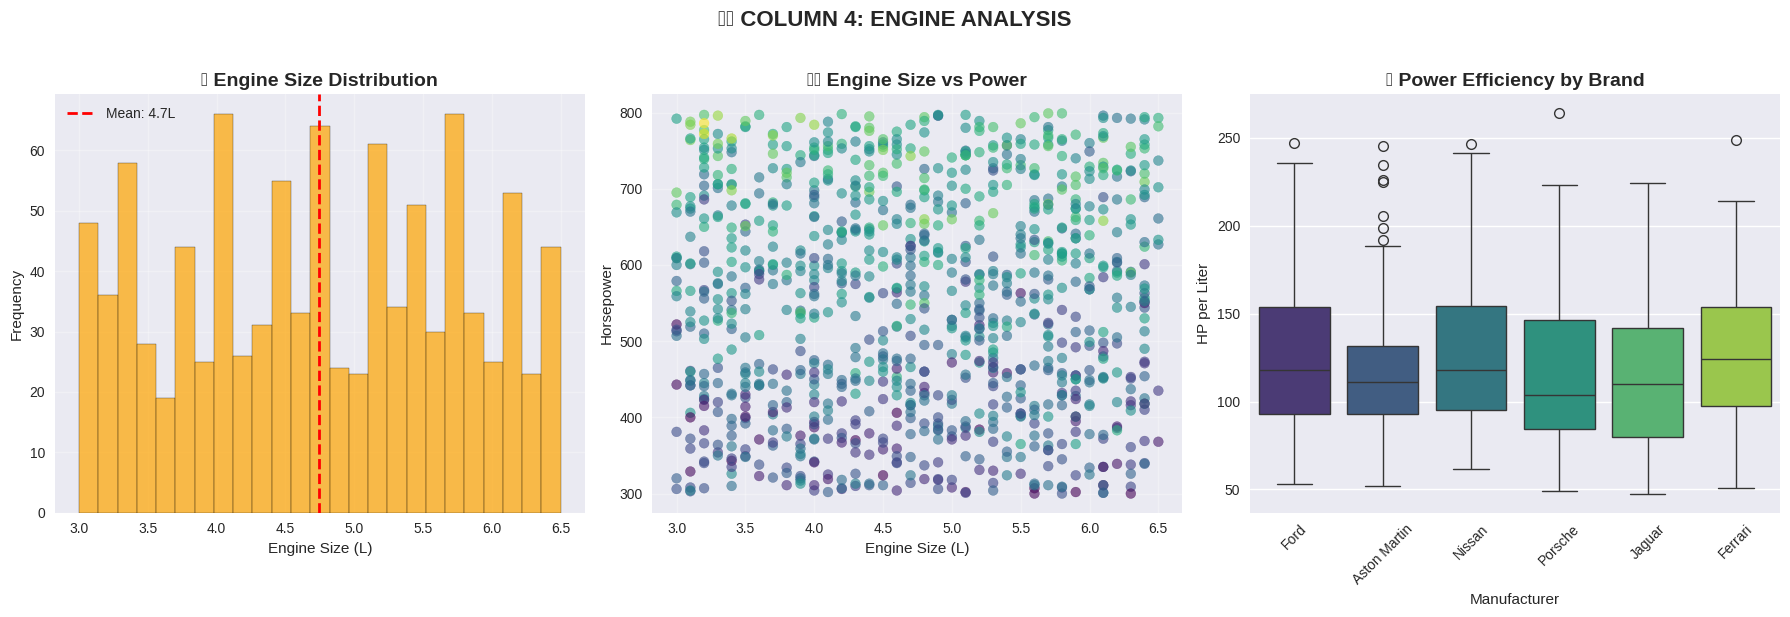

In [ ]:
# ================================
# COLUMN 4: ENGINE ANALYSIS (3 GRAPHS)
# ================================

def column_4_engine_analysis(df):
    """Column 4: Engine Analysis (3 graphs)"""
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # Graph 4.1: Engine Size Distribution
    ax1.hist(df['Engine_Size'], bins=25, alpha=0.7, color='orange', edgecolor='black')
    mean_engine = df['Engine_Size'].mean()
    ax1.axvline(mean_engine, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_engine:.1f}L')
    ax1.set_title('🔧 Engine Size Distribution', fontweight='bold', fontsize=14)
    ax1.set_xlabel('Engine Size (L)')
    ax1.set_ylabel('Frequency')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Graph 4.2: Engine Size vs Horsepower
    scatter4 = ax2.scatter(df['Engine_Size'], df['Horsepower'], alpha=0.6, c=df['Price'], cmap='viridis', s=50)
    ax2.set_title('⚙️ Engine Size vs Power', fontweight='bold', fontsize=14)
    ax2.set_xlabel('Engine Size (L)')
    ax2.set_ylabel('Horsepower')
    ax2.grid(True, alpha=0.3)

    # Graph 4.3: Power Efficiency (HP per Liter)
    df['HP_per_Liter'] = df['Horsepower'] / df['Engine_Size']
    top_makes = df['Make'].value_counts().head(6).index
    df_eff = df[df['Make'].isin(top_makes)]
    sns.boxplot(data=df_eff, x='Make', y='HP_per_Liter', ax=ax3, palette='viridis')
    ax3.set_title('⚡ Power Efficiency by Brand', fontweight='bold', fontsize=14)
    ax3.set_xlabel('Manufacturer')
    ax3.set_ylabel('HP per Liter')
    ax3.tick_params(axis='x', rotation=45)

    plt.suptitle('⚙️ COLUMN 4: ENGINE ANALYSIS', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# Call the function to display the graph when the cell is run
# Ensure df is defined before calling the function
df = load_sports_car_data() # Load data if df is not defined
column_4_engine_analysis(df)

📊 Loading Sports Car Dataset...
✅ Loaded 1000 cars from 12 manufacturers


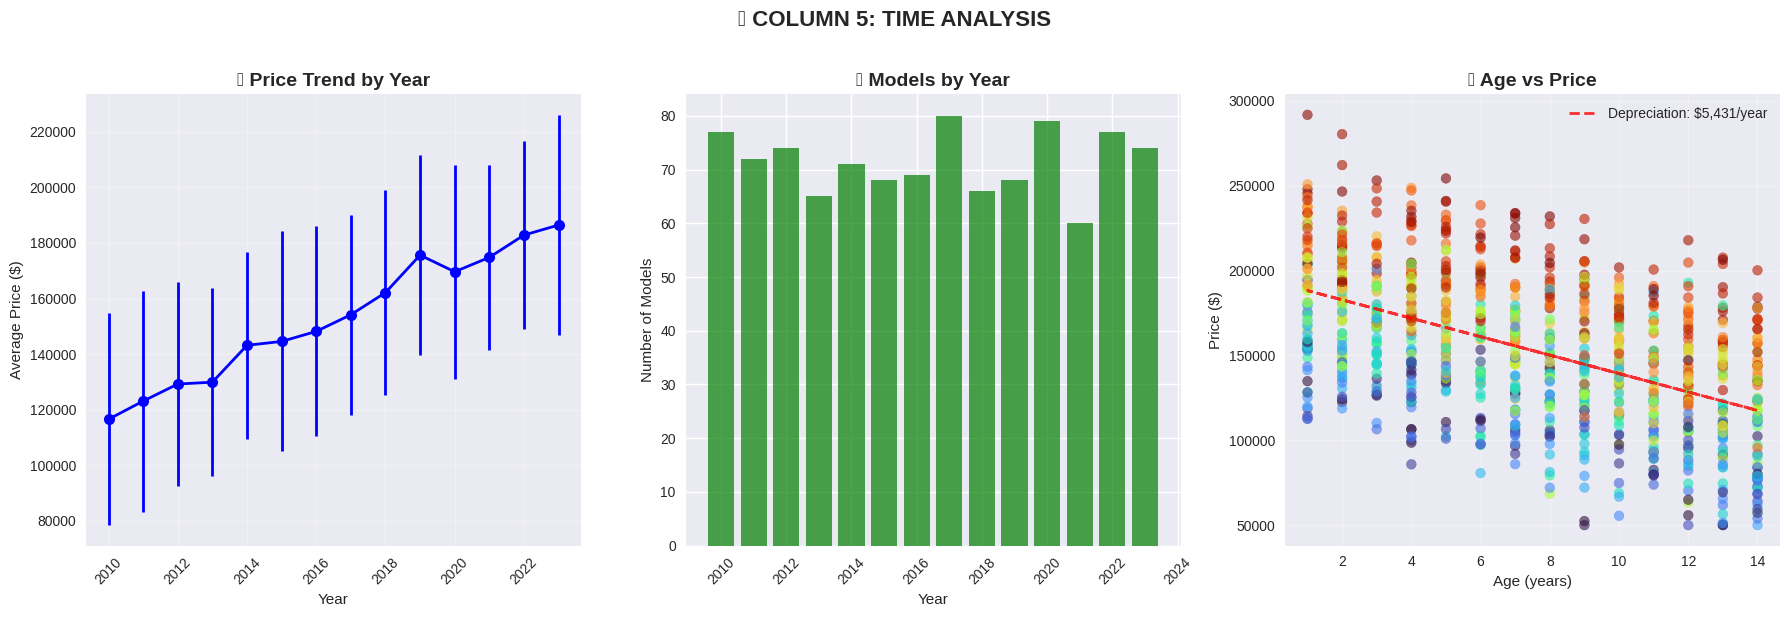

In [ ]:
# ================================
# COLUMN 5: TIME ANALYSIS (3 GRAPHS)
# ================================

def column_5_time_analysis(df):
    """Column 5: Time and Age Analysis (3 graphs)"""
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # Graph 5.1: Price Trend Over Years
    year_stats = df.groupby('Year')['Price'].agg(['mean', 'std']).reset_index()
    ax1.errorbar(year_stats['Year'], year_stats['mean'], yerr=year_stats['std'],
                marker='o', linewidth=2, markersize=8, capsize=5, color='blue')
    ax1.set_title('📈 Price Trend by Year', fontweight='bold', fontsize=14)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Average Price ($)')
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)

    # Graph 5.2: Model Count by Year
    year_counts = df['Year'].value_counts().sort_index()
    ax2.bar(year_counts.index, year_counts.values, alpha=0.7, color='green')
    ax2.set_title('🚗 Models by Year', fontweight='bold', fontsize=14)
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Number of Models')
    ax2.tick_params(axis='x', rotation=45)

    # Graph 5.3: Age vs Price (Depreciation)
    scatter5 = ax3.scatter(df['Age'], df['Price'], alpha=0.6, c=df['Horsepower'], cmap='turbo', s=50)
    z3 = np.polyfit(df['Age'], df['Price'], 1)
    p3 = np.poly1d(z3)
    ax3.plot(df['Age'], p3(df['Age']), "r--", alpha=0.8, linewidth=2,
            label=f'Depreciation: ${-z3[0]:,.0f}/year')
    ax3.set_title('⏰ Age vs Price', fontweight='bold', fontsize=14)
    ax3.set_xlabel('Age (years)')
    ax3.set_ylabel('Price ($)')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    plt.suptitle('📅 COLUMN 5: TIME ANALYSIS', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# Call the function to display the graph when the cell is run
# Ensure df is defined and 'Age' column exists before calling the function
df = load_sports_car_data() # Load data if df is not defined
df['Age'] = 2024 - df['Year'] # Calculate 'Age' column
column_5_time_analysis(df)

📊 Loading Sports Car Dataset...
✅ Loaded 1000 cars from 12 manufacturers


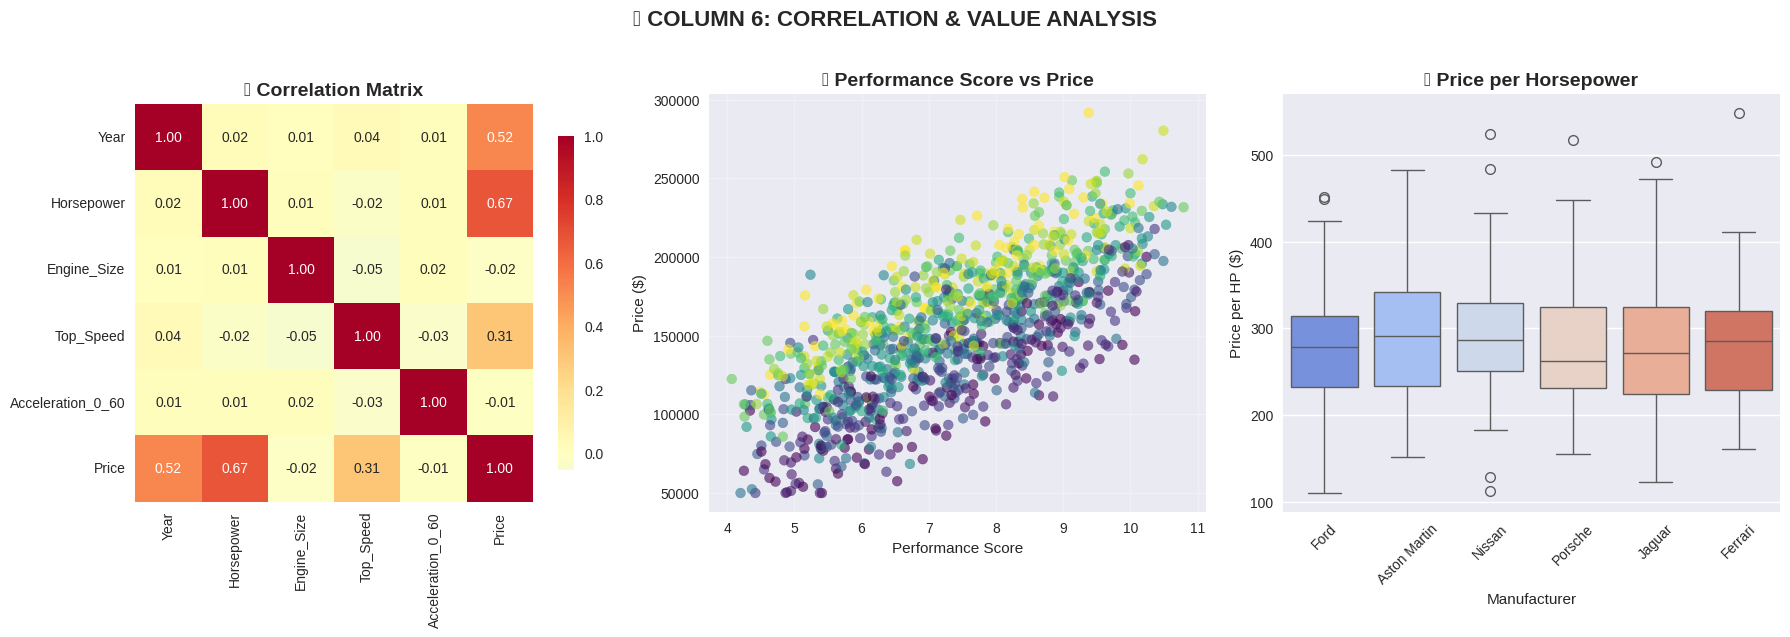

In [ ]:
# ================================
# COLUMN 6: CORRELATION & ADVANCED (3 GRAPHS)
# ================================

def column_6_correlation_analysis(df):
    """Column 6: Correlation and Advanced Analysis (3 graphs)"""
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # Graph 6.1: Correlation Heatmap
    numeric_cols = ['Year', 'Horsepower', 'Engine_Size', 'Top_Speed', 'Acceleration_0_60', 'Price']
    corr_matrix = df[numeric_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0,
                square=True, fmt='.2f', ax=ax1, cbar_kws={'shrink': 0.8})
    ax1.set_title('🔗 Correlation Matrix', fontweight='bold', fontsize=14)

    # Graph 6.2: Performance vs Price Scatter Matrix Style
    # Create a performance score
    df['Performance_Score'] = (df['Horsepower'] + df['Top_Speed'] - df['Acceleration_0_60'] * 20) / 100
    scatter6 = ax2.scatter(df['Performance_Score'], df['Price'], alpha=0.6, c=df['Year'], cmap='viridis', s=50)
    ax2.set_title('🎯 Performance Score vs Price', fontweight='bold', fontsize=14)
    ax2.set_xlabel('Performance Score')
    ax2.set_ylabel('Price ($)')
    ax2.grid(True, alpha=0.3)

    # Graph 6.3: Value Analysis (Price per Performance)
    df['Price_per_HP'] = df['Price'] / df['Horsepower']
    top_makes_value = df['Make'].value_counts().head(6).index
    df_value = df[df['Make'].isin(top_makes_value)]
    sns.boxplot(data=df_value, x='Make', y='Price_per_HP', ax=ax3, palette='coolwarm')
    ax3.set_title('💵 Price per Horsepower', fontweight='bold', fontsize=14)
    ax3.set_xlabel('Manufacturer')
    ax3.set_ylabel('Price per HP ($)')
    ax3.tick_params(axis='x', rotation=45)

    plt.suptitle('🧠 COLUMN 6: CORRELATION & VALUE ANALYSIS', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# Call the function to display the graph when the cell is run
# Ensure df is defined before calling the function
df = load_sports_car_data() # Load data if df is not defined
column_6_correlation_analysis(df)

In [ ]:
# ================================
# SUMMARY STATISTICS FUNCTIONS
# ================================

def generate_insights(df):
    """Generate key insights from the data"""
    print("\n📋 KEY INSIGHTS FROM THE DATA")
    print("=" * 40)

    # Basic stats
    print(f"📊 Dataset Overview:")
    print(f"   • Total cars: {len(df):,}")
    print(f"   • Manufacturers: {df['Make'].nunique()}")
    print(f"   • Year range: {df['Year'].min()} - {df['Year'].max()}")
    print(f"   • Price range: ${df['Price'].min():,} - ${df['Price'].max():,}")

    # Top performers
    most_expensive = df.loc[df['Price'].idxmax()]
    most_powerful = df.loc[df['Horsepower'].idxmax()]
    fastest = df.loc[df['Top_Speed'].idxmax()]

    print(f"\n🏆 Top Performers:")
    print(f"   • Most Expensive: {most_expensive['Make']} (${most_expensive['Price']:,})")
    print(f"   • Most Powerful: {most_powerful['Make']} ({most_powerful['Horsepower']} HP)")
    print(f"   • Fastest: {fastest['Make']} ({fastest['Top_Speed']} mph)")

    # Market insights
    popular_make = df['Make'].mode().iloc[0]
    avg_price_popular = df[df['Make'] == popular_make]['Price'].mean()

    print(f"\n💰 Market Insights:")
    print(f"   • Most popular brand: {popular_make}")
    print(f"   • Average price of {popular_make}: ${avg_price_popular:,.0f}")
    print(f"   • Overall average price: ${df['Price'].mean():,.0f}")

    # Correlations
    hp_price_corr = df['Horsepower'].corr(df['Price'])
    speed_price_corr = df['Top_Speed'].corr(df['Price'])

    print(f"\n🔗 Key Relationships:")
    print(f"   • Horsepower ↔ Price correlation: {hp_price_corr:.3f}")
    print(f"   • Top Speed ↔ Price correlation: {speed_price_corr:.3f}")

In [ ]:
# ================================
# MAIN EXECUTION FUNCTIONS
# ================================

def run_all_columns(df):

    generate_insights(df)
    print("✅ All 6 columns (18 graphs) completed!")

def run_specific_column(df, column_number):
    """Run a specific column by number (1-6)"""
    column_functions = {
        1: column_1_price_analysis,
        2: column_2_manufacturer_analysis,
        3: column_3_performance_analysis,
        4: column_4_engine_analysis,
        5: column_5_time_analysis,
        6: column_6_correlation_analysis
    }

    column_names = {
        1: "Price Analysis",
        2: "Manufacturer Analysis",
        3: "Performance Analysis",
        4: "Engine Analysis",
        5: "Time Analysis",
        6: "Correlation Analysis"
    }

    if column_number in column_functions:
        print(f"🎯 Running Column {column_number}: {column_names[column_number]}...")
        column_functions[column_number](df)
    else:
        print(f"❌ Column {column_number} not found. Choose 1-6.")

def show_column_menu():
    """Display available columns menu"""
    print("\n📊 AVAILABLE ANALYSIS COLUMNS:")
    print("=" * 35)
    print("1. 💰 Price Analysis (3 graphs)")
    print("2. 🏭 Manufacturer Analysis (3 graphs)")
    print("3. 🏁 Performance Analysis (3 graphs)")
    print("4. ⚙️ Engine Analysis (3 graphs)")
    print("5. 📅 Time Analysis (3 graphs)")
    print("6. 🧠 Correlation Analysis (3 graphs)")
    print("\n💡 Usage:")
    print("• run_all_columns(df) - Show all columns")
    print("• run_specific_column(df, 3) - Show specific column")

def main_analysis():
    """Main function to run the complete analysis"""
    print("🚗✨ SPORTS CAR EDA - MULTIPLE GRAPHS IN COLUMNS ✨🚗")
    print("=" * 60)

    # Load data
    df = load_sports_car_data()

    print(f"\n🔍 Dataset Info: {df.shape[0]} cars, {df.shape[1]} features")
    print(f"Columns: {list(df.columns)}")

    # Show menu
    show_column_menu()

    # Run all columns
    print(f"\n🚀 Running complete analysis...")
    run_all_columns(df)

    return df

# Run the analysis
if __name__ == "__main__":
    df = main_analysis()

    print(f"\n🔍 QUICK COMMANDS:")
    print("=" * 20)
    print("• df = load_sports_car_data() - Reload data")
    print("• run_specific_column(df, 1) - Show price analysis")
    print("• run_specific_column(df, 3) - Show performance analysis")
    print("• show_column_menu() - See all available columns")
    print("• generate_insights(df) - Show data insights")

🚗✨ SPORTS CAR EDA - MULTIPLE GRAPHS IN COLUMNS ✨🚗
📊 Loading Sports Car Dataset...
✅ Loaded 1000 cars from 12 manufacturers

🔍 Dataset Info: 1000 cars, 7 features
Columns: ['Make', 'Year', 'Horsepower', 'Engine_Size', 'Top_Speed', 'Acceleration_0_60', 'Price']

📊 AVAILABLE ANALYSIS COLUMNS:
1. 💰 Price Analysis (3 graphs)
2. 🏭 Manufacturer Analysis (3 graphs)
3. 🏁 Performance Analysis (3 graphs)
4. ⚙️ Engine Analysis (3 graphs)
5. 📅 Time Analysis (3 graphs)
6. 🧠 Correlation Analysis (3 graphs)

💡 Usage:
• run_all_columns(df) - Show all columns
• run_specific_column(df, 3) - Show specific column

🚀 Running complete analysis...

📋 KEY INSIGHTS FROM THE DATA
📊 Dataset Overview:
   • Total cars: 1,000
   • Manufacturers: 12
   • Year range: 2010 - 2023
   • Price range: $50,000 - $291,722

🏆 Top Performers:
   • Most Expensive: Aston Martin ($291,722)
   • Most Powerful: Ferrari (799 HP)
   • Fastest: Porsche (349 mph)

💰 Market Insights:
   • Most popular brand: Ferrari
   • Average price o